__Final Project - Machine Learning__


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import KFold 
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KernelDensity
from sklearn.ensemble import RandomForestClassifier ,BaggingClassifier ,AdaBoostClassifier ,VotingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV

# Load Data 

In [2]:
data = pd.read_csv('pd_speech_features.csv')
data.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [3]:
null_values=data.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(data)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
id,0,0.0
tqwt_medianValue_dec_6,0,0.0
tqwt_TKEO_std_dec_33,0,0.0
tqwt_TKEO_std_dec_34,0,0.0
tqwt_TKEO_std_dec_35,0,0.0
...,...,...
det_LT_entropy_log_2_coef,0,0.0
det_LT_entropy_log_3_coef,0,0.0
det_LT_entropy_log_4_coef,0,0.0
det_LT_entropy_log_5_coef,0,0.0


In [4]:
X_data = data.drop(columns=['class','id'], axis = 1)  # select the independent variables
y_data = data.loc[:,'class']   # select the class column
# check wether the dataset is balanced or not

# Data Processing

over sampling

In [5]:
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X_data, y_data)

In [6]:
X_scaler = StandardScaler().fit_transform(X)

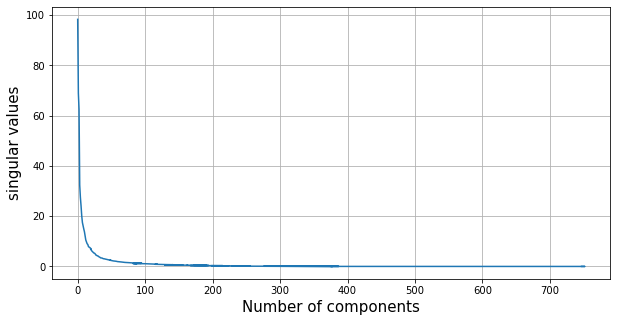

In [7]:
cov_X_scaler = np.cov(X_scaler.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_X_scaler)

plt.figure(figsize=(10,5))
plt.plot(pd.DataFrame(eigenvalues).sort_values(by = 0,ascending=False))
plt.grid()
plt.xlabel('Number of components',fontsize =15)
plt.ylabel('singular values',fontsize =15);

In [8]:
pca = PCA(whiten=False,svd_solver='full').fit(X_scaler)

component = 0
var = 0
for i in range(len(pca.explained_variance_ratio_)):
    var +=pca.explained_variance_ratio_[i]
    component +=1
    if var>=0.90:
        break
print(component)

107


Text(0, 0.5, 'Cumulative explained variance')

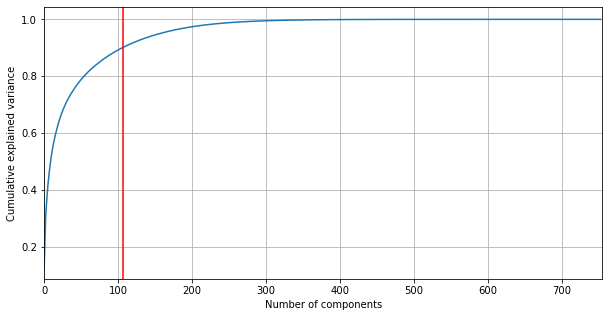

In [9]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axvline(x=component, color='r', linestyle='-')
plt.xlim(0,754,1)
plt.grid()
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

# Dimensionality reduction

In [10]:
pca = PCA(whiten=False,svd_solver='full',n_components = component)
x_transformed = pca.fit_transform(X_scaler) 

In [11]:
y.shape

(1128,)

split train and test

In [12]:
X_main, X_test, y_main, y_test = train_test_split(x_transformed, y, test_size = 0.20, random_state = 10)
print("X_train2 shape = ",X_main.shape)
print("X_test2 shape = ",X_test.shape)

X_train2 shape =  (902, 107)
X_test2 shape =  (226, 107)


In [13]:
# check wether the dataset is balanced or not
np.unique(y_main, return_counts = True)

(array([0, 1], dtype=int64), array([451, 451], dtype=int64))

# Generative model

__Parzen Estimation__

In [14]:
#validation and train data

kf = KFold(n_splits=10) #k fold
kf.get_n_splits(X_main) 

10

In [15]:
def accuracy(y_pred,y_test): #accuracy function
    count = 0
    acc = 0
    for i in range(len(y_pred)):
        if y_pred[i] == y_test.iloc[i]:   #checking real class label and y predict 
            count +=1        #count the equals one
    acc = count / len(y_test)   #calculate the accuracy
    return acc

In [16]:
acc = []
com = []
kernel_bandwidth = []
kernel = ['gaussian' , 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']
bandwidth = [0.1 , 0.5 , 1 , 1.5 , 2 , 2.5 , 3 ]
for train_index, validation_index in kf.split(X_main):     #kfold
    
    
    X_train, X_validation = X_main[train_index], X_main[validation_index]
    y_train, y_validation = y_main.iloc[train_index], y_main.iloc[validation_index]
    
    X0 = X_train[y_train == 0]
    X1 = X_train[y_train == 1]
    
    prior0 = X0.shape[0]/X_main.shape[0]
    prior1 = X1.shape[0]/X_main.shape[0]
    
    for k in kernel:
        for i in bandwidth:
            kde0 = KernelDensity(bandwidth=i, kernel=k).fit(X0)
            kde1 = KernelDensity(bandwidth=i, kernel=k).fit(X1)

            y_pred = []
            for x in X_validation:
                k0 = kde0.score([x])*prior0
                k1 = kde1.score([x])*prior1
                if k0 >= k1:
                    y_pred.append(0) 
                else:
                    y_pred.append(1) 
            a = accuracy(y_pred , y_validation)
            kernel_bandwidth.append({'kernel':k , 'acc':a , 'bandwidth':i })   #list of accuracy and number of components
acc_result = pd.DataFrame(kernel_bandwidth)  #creae the component dataframe
acc_result = acc_result.groupby(['kernel' , 'bandwidth']).mean()
acc_result

acc
kernel       bandwidth          
cosine       0.1        0.502137
             0.5        0.523199
             1.0        0.554261
             1.5        0.580940
             2.0        0.604139
             2.5        0.611929
             3.0        0.641978
epanechnikov 0.1        0.513407
             0.5        0.546667
             1.0        0.588730
             1.5        0.625214
             2.0        0.667448
             2.5        0.674151
             3.0        0.669634
exponential  0.1        0.879109
             0.5        0.932320
             1.0        0.891197
             1.5        0.833480
             2.0        0.785958
             2.5        0.741648
             3.0        0.688596
gaussian     0.1        0.910183
             0.5        0.828132
             1.0        0.839121
             1.5        0.890183
             2.0        0.934530
             2.5        0.946728
             3.0        0.936752
linear       0.1        0.513394
             0.5        0.559963
             1.0        0.597595
             1.5        0.630891
             2.0        0.664078
             2.5        0.676374
             3.0        0.686239
tophat       0.1        0.514518
             0.5        0.561038
             1.0        0.610940
             1.5        0.634225
             2.0        0.650830
             2.5        0.670757
             3.0        0.678535

In [17]:
acc_train = np.max(acc_result['acc'])
print("The accuracy of model is {0:0.2f}".format(acc_train))

The accuracy of model is 0.95


Train parzen for bandwidth=2.5, kernel='gaussian'

In [18]:
##fit the best model
acc = []
y_pred = []

X0 = X_main[y_main == 0]
X1 = X_main[y_main == 1]
    
prior0 = X0.shape[0]/X_main.shape[0]
prior1 = X1.shape[0]/X_main.shape[0]
    

kde0 = KernelDensity(bandwidth=2.5, kernel='gaussian').fit(X0)
kde1 = KernelDensity(bandwidth=2.5, kernel='gaussian').fit(X1)


for x in X_test:
    k0 = kde0.score([x])*prior0
    k1 = kde1.score([x])*prior1
    if k0 >= k1:
        y_pred.append(0) 
    else:
        y_pred.append(1) 
acc_test = accuracy(y_pred , y_test)


In [20]:
print('Our test accuracy' , acc_test)
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred))
print('Classification \n', classification_report(y_test, y_pred))

Our test accuracy 0.9557522123893806
Confusion matrix 
 [[112   1]
 [  9 104]]
Classification 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       113
           1       0.99      0.92      0.95       113

    accuracy                           0.96       226
   macro avg       0.96      0.96      0.96       226
weighted avg       0.96      0.96      0.96       226



In [21]:
score_test = []
score_train = []
score_test.append(acc_test)
score_train.append(acc_train)
Parzen_roc_auc = roc_auc_score(y_test, y_pred)
fpr_Parzen, tpr_Parzen, thresholds_Parzen = roc_curve(y_test, y_pred)

__KNN__

In [22]:
neighbor = []
for train_index, validation_index in kf.split(X_main):     #kfold
    
    
    X_train, X_validation = X_main[train_index], X_main[validation_index]
    y_train, y_validation = y_main.iloc[train_index], y_main.iloc[validation_index]
    
    
    for i in range(1,11):
        classifier = KNeighborsClassifier(n_neighbors=i)
        classifier.fit(X_train, y_train)
        y_pred = []
        for x in X_validation:
            p = classifier.predict_proba([x])
            y_pred.append(np.argmax(p))
        a = accuracy(y_pred , y_validation)
        neighbor.append({ 'neighbor':i , 'acc':a  })

In [23]:
acc_result = pd.DataFrame(neighbor)  #creae the component dataframe
result = acc_result.groupby(['neighbor']).mean()
result

,acc
neighbor,
1,0.968950
2,0.946764
3,0.941221
4,0.920147
5,0.905763
6,0.899133
7,0.903553
8,0.895849
9,0.883626


In [25]:
acc_train = np.max(result['acc'])
print("The accuracy of model is {0:0.2f}".format(acc_train))

The accuracy of model is 0.97


In [28]:
#fit the best model
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)
y_pred = []
for x in X_test:
    p = classifier.predict_proba([x])
    y_pred.append(np.argmax(p))
acc_test = accuracy(y_pred , y_test)
print('Our test accuracy:' , acc_test)
print('Confusion matrix: \n',  confusion_matrix(y_test, y_pred))
print('Classification \n', classification_report(y_test, y_pred))

Our test accuracy: 0.9646017699115044
Confusion matrix: 
 [[111   2]
 [  6 107]]
Classification 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       113
           1       0.98      0.95      0.96       113

    accuracy                           0.96       226
   macro avg       0.97      0.96      0.96       226
weighted avg       0.97      0.96      0.96       226



In [29]:
score_test.append(acc_test)
score_train.append(acc_train)
knn_gen_roc_auc = roc_auc_score(y_test, y_pred)
fpr_knn_gen, tpr_knn_gen, thresholds_Parzen_gen = roc_curve(y_test, y_pred)

__GMM__

In [30]:
acc = []
com = []
component = []
for train_index, validation_index in kf.split(X_main):     #kfold
    
    X_train, X_validation = X_main[train_index], X_main[validation_index]
    y_train, y_validation = y_main.iloc[train_index], y_main.iloc[validation_index]
    
    X0 = X_train[y_train == 0]
    X1 = X_train[y_train == 1]
    
    for j in range(1,6):     #1-5 components for the first class
        for k in range(1,6):      #1-5 components for the second class
            GMM0 = GaussianMixture(n_components=j, covariance_type='full').fit(X0 )  
            GMM1 = GaussianMixture(n_components=k, covariance_type='full').fit(X1 )
            
            y_pred = []
            for x in X_validation:
                g0 = GMM0.score([x])
                g1 = GMM1.score([x])
                
                if g0 >= g1:
                    y_pred.append(0) 
                else:
                    y_pred.append(1) 
            a = accuracy(y_pred , y_validation)
            component.append({'acc':a , 'com1':j,'comt2':k })   #list of accuracy and number of components
acc_result = pd.DataFrame(component)  #creae the component dataframe
acc_result

,acc,com1,comt2
0,0.868132,1,1
1,0.912088,1,2
2,0.813187,1,3
3,0.747253,1,4
4,0.714286,1,5
...,...,...,...
245,0.955556,5,1
246,0.955556,5,2
247,0.955556,5,3
248,0.955556,5,4


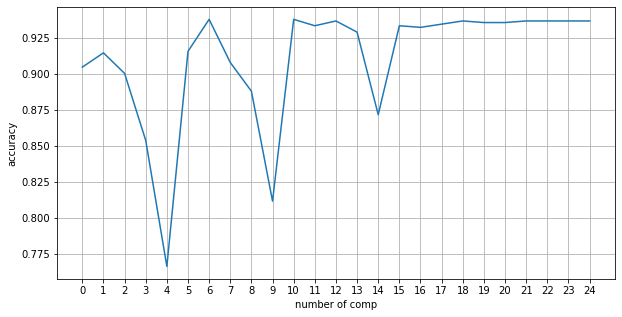

In [31]:
q = acc_result.groupby(['com1','comt2']).mean()  #calculating means of accuracy of same component from each fold
q = q.reset_index()

plt.figure(figsize=(10, 5))
plt.plot(q.index , q['acc']) 
plt.xlabel('number of comp')
plt.ylabel('accuracy')
plt.grid()
plt.xticks(np.arange(0,25,1));

In [37]:
temp = q[(q['acc']==q['acc'].max())]  #max accuracy and component numbers of maximum
temp

,com1,comt2,acc
6,2,2,0.937863
10,3,1,0.937863


In [38]:
acc_train = temp.iloc[0,2]
print("The accuracy of model is {0:0.2f}".format(acc_train))

The accuracy of model is 0.94


In [35]:
acc = []
    
X0 = X_train[y_train == 0]
X1 = X_train[y_train == 1]
    
GMM0 = GaussianMixture(n_components=temp.iloc[0,0], covariance_type='full').fit(X0 )  
GMM1 = GaussianMixture(n_components=temp.iloc[0,1], covariance_type='full').fit(X1 )
            
y_pred = []
for x in X_test:
    g0 = GMM0.score([x])
    g1 = GMM1.score([x])
                
    if g0 >= g1:
        y_pred.append(0) 
    else:
        y_pred.append(1) 
acc_test = accuracy(y_pred , y_test)
print('Our test accuracy:' , acc_test)
print('Confusion matrix: \n',  confusion_matrix(y_test, y_pred))
print('Classification \n', classification_report(y_test, y_pred))

Our test accuracy: 0.9424778761061947
Confusion matrix: 
 [[100  13]
 [  0 113]]
Classification 
               precision    recall  f1-score   support

           0       1.00      0.88      0.94       113
           1       0.90      1.00      0.95       113

    accuracy                           0.94       226
   macro avg       0.95      0.94      0.94       226
weighted avg       0.95      0.94      0.94       226



In [36]:
score_test.append(acc_test)
score_train.append(acc_train)
GMM_roc_auc = roc_auc_score(y_test, y_pred)
fpr_GMM, tpr_GMM, thresholds_GMM = roc_curve(y_test, y_pred)

# Discriminative model

__Logistic regression__

train a Logistic regression model with find its accuracy

In [40]:
from sklearn.model_selection import GridSearchCV
classifier_LR = LogisticRegression(random_state=0)
parameters = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

clf = GridSearchCV(classifier_LR,parameters)

clf.fit(X_main,y_main)
print('best parameters of the model are:',clf.best_params_)

C:\Users\Mojtaba PC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mojtaba PC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mojtaba PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Mojtaba PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Mojtaba PC\anaconda3\lib\site-packages\s

C:\Users\Mojtaba PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Mojtaba PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

best parameters of the model are: {'C': 0.1, 'penalty': 'l2'}


C:\Users\Mojtaba PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Mojtaba PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [41]:
y_pred = clf.predict(X_test)
print('accuracy of the model is:',clf.score(X_test,y_test))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred))
print('Classification \n', classification_report(y_test, y_pred))

accuracy of the model is: 0.8539823008849557
Confusion matrix 
 [[98 15]
 [18 95]]
Classification 
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       113
           1       0.86      0.84      0.85       113

    accuracy                           0.85       226
   macro avg       0.85      0.85      0.85       226
weighted avg       0.85      0.85      0.85       226



In [42]:
LR_roc_auc = roc_auc_score(y_test, y_pred)
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, y_pred)
score_test.append(clf.score( X_test,y_test))
score_train.append(clf.score( X_train,y_train))

__SVM__

 train a SVM model with tuning C-Value

In [43]:
# tune parameters
model = svm.SVC(kernel='poly',class_weight='balanced', decision_function_shape='ovo')
clf_poly = GridSearchCV(model,param_grid={'C':[.5, .7 ,1, 1.5],'degree':[1 ,2, 3 ,4],
                                   'gamma':[1 ,2 ,3 ,4, 5]},return_train_score='False')
clf_poly.fit(X_main,y_main)
print('best parameters of the model are:',clf_poly.best_params_)

best parameters of the model are: {'C': 0.5, 'degree': 3, 'gamma': 1}


In [45]:
y_pred = clf_poly.predict(X_test)
print('accuracy of the model is:',clf_poly.score(X_test,y_test))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred))
print('Classification \n', classification_report(y_test, y_pred))

accuracy of the model is: 0.9601769911504425
Confusion matrix 
 [[107   6]
 [  3 110]]
Classification 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       113
           1       0.95      0.97      0.96       113

    accuracy                           0.96       226
   macro avg       0.96      0.96      0.96       226
weighted avg       0.96      0.96      0.96       226



In [46]:
SVM_roc_auc = roc_auc_score(y_test, y_pred)
fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(y_test, y_pred)
score_test.append(clf_poly.score( X_test,y_test))
score_train.append(clf_poly.score( X_main,y_main))

# Decision Tree

train a decision tree model with find its accuracy

In [47]:
model = DT(random_state=0)

tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70]}

clf = GridSearchCV(model, tree_para, cv=5)

clf.fit(X_main,y_main)
print('best parameters of the model are:',clf.best_params_)

best parameters of the model are: {'criterion': 'gini', 'max_depth': 10}


In [49]:
y_pred = clf.predict(X_test)
print('accuracy of the model is:',clf.score(X_test,y_test))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred))
print('Classification \n', classification_report(y_test, y_pred))

accuracy of the model is: 0.8539823008849557
Confusion matrix 
 [[106   7]
 [ 26  87]]
Classification 
               precision    recall  f1-score   support

           0       0.80      0.94      0.87       113
           1       0.93      0.77      0.84       113

    accuracy                           0.85       226
   macro avg       0.86      0.85      0.85       226
weighted avg       0.86      0.85      0.85       226



In [50]:
DT_roc_auc = roc_auc_score(y_test, y_pred)
fpr_DT, tpr_DT, thresholds_DT = roc_curve(y_test, y_pred)
score_test.append(clf.score( X_test,y_test))
score_train.append(clf.score( X_train,y_train))

# KNN

Train the classifier for different K.

In [51]:
classifier_knn = KNeighborsClassifier()

knn_para = {'n_neighbors':[1,2,3,4,5,10,20,30],'weights':['uniform','distance'],
            'metric':['euclidean','minkowski']}

clf = GridSearchCV(classifier_knn, knn_para, cv=5)

y_pred = clf.fit(X_main,y_main)

clf.fit(X_main,y_main)
print('best parameters of the model are:',clf.best_params_)

best parameters of the model are: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}


In [52]:
y_pred = clf.predict(X_test)
print('accuracy of the model is:',clf.score(X_test,y_test))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred))
print('Classification \n', classification_report(y_test, y_pred))

accuracy of the model is: 0.9690265486725663
Confusion matrix 
 [[111   2]
 [  5 108]]
Classification 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       113
           1       0.98      0.96      0.97       113

    accuracy                           0.97       226
   macro avg       0.97      0.97      0.97       226
weighted avg       0.97      0.97      0.97       226



Text(0, 0.5, 'Mean Error')

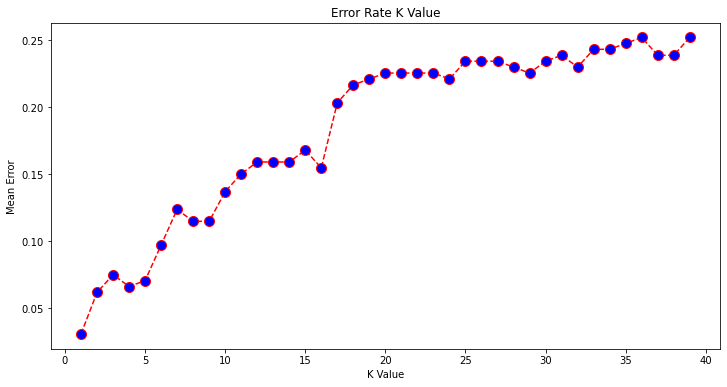

In [53]:
error = []

for i in range(1, 40):
    classifier_knn = KNeighborsClassifier(n_neighbors=i).fit(X_main,y_main)   
    pred_i = classifier_knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')      

In [54]:
knn_dis_roc_auc = roc_auc_score(y_test, y_pred)
fpr_knn_dis, tpr_knn_dis, thresholds_knn_dis = roc_curve(y_test, y_pred)
score_test.append(clf.score( X_test,y_test))
score_train.append(clf.score( X_train,y_train))

__MLP__

train a MLP model with find its accuracy

In [55]:
classifier_MLP = MLPClassifier()

parameters = {'activation': ['tanh', 'relu'],
               'solver': ['sgd', 'adam'],
                'alpha': [0.0001, 0.05],
                'learning_rate': ['constant','adaptive']}
    
clf = GridSearchCV(classifier_MLP, parameters, cv=5)

y_pred = clf.fit(X_main,y_main)

clf.fit(X_main,y_main)
print('best parameters of the model are:',clf.best_params_)

C:\Users\Mojtaba PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Mojtaba PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Mojtaba PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Mojtaba PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Mojtaba PC\anaconda3\lib\site-packages\skle

C:\Users\Mojtaba PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Mojtaba PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Mojtaba PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Mojtaba PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Mojtaba PC\anaconda3\lib\site-packages\skle

C:\Users\Mojtaba PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Mojtaba PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Mojtaba PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Mojtaba PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Mojtaba PC\anaconda3\lib\site-packages\skle

best parameters of the model are: {'activation': 'tanh', 'alpha': 0.05, 'learning_rate': 'constant', 'solver': 'adam'}


In [56]:
y_pred = clf.predict(X_test)
print('accuracy of the model is:',clf.score(X_test,y_test))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred))
print('Classification \n', classification_report(y_test, y_pred))

accuracy of the model is: 0.9601769911504425
Confusion matrix 
 [[112   1]
 [  8 105]]
Classification 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       113
           1       0.99      0.93      0.96       113

    accuracy                           0.96       226
   macro avg       0.96      0.96      0.96       226
weighted avg       0.96      0.96      0.96       226



In [57]:
MLP_roc_auc = roc_auc_score(y_test, y_pred)
fpr_MLP, tpr_MLP, thresholds_MLP = roc_curve(y_test, y_pred)
score_test.append(clf.score( X_test,y_test))
score_train.append(clf.score( X_train,y_train))

# Ensemble learning

In [60]:
#Random Forrest - Ensemble of Decision Tree

Classifier_rf = RandomForestClassifier(n_estimators=20 , max_depth=None,  min_samples_split=2, random_state=5).fit(X_main,y_main)
y_pred = Classifier_rf.predict(X_test)

acc = cross_val_score(Classifier_rf, X_test, y_test, cv=3, scoring='accuracy')
print("Our test accuracy: " , Classifier_rf.score(X_test,y_test))
print("Our train accuracy is: %.2f%% +- %.2f%%" %(np.mean(acc),np.std(acc)))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred))
print('Classification \n', classification_report(y_test, y_pred))

Our test accuracy:  0.9292035398230089
Our train accuracy is: 0.68% +- 0.03%
Confusion matrix 
 [[107   6]
 [ 10 103]]
Classification 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       113
           1       0.94      0.91      0.93       113

    accuracy                           0.93       226
   macro avg       0.93      0.93      0.93       226
weighted avg       0.93      0.93      0.93       226



In [69]:
#bagging
Classifier_bg = BaggingClassifier(DT(criterion='gini', max_depth= 10), max_samples = 0.5 , max_features = 0.5 , n_estimators = 10).fit(X_main,y_main)
#Classifier_bg = BaggingClassifier( KNeighborsClassifier(n_neighbors=1),max_samples=0.5, max_features=0.5).fit(X_main,y_main)
y_pred = Classifier_bg.predict(X_test)

acc = cross_val_score(Classifier_bg, X_main, y_main, cv=10, scoring='accuracy')
print("Our test accuracy: " ,Classifier_bg.score(X_test,y_test))
print("Our train accuracy is: %.2f%% +- %.2f%%" %(np.mean(acc),np.std(acc)))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred))
print('Classification \n', classification_report(y_test, y_pred))

Our test accuracy:  0.8761061946902655
Our train accuracy is: 0.86% +- 0.03%
Confusion matrix 
 [[104   9]
 [ 19  94]]
Classification 
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       113
           1       0.91      0.83      0.87       113

    accuracy                           0.88       226
   macro avg       0.88      0.88      0.88       226
weighted avg       0.88      0.88      0.88       226



In [61]:
Classifier_bg = BaggingClassifier(base_estimator=SVC(kernel = 'poly' , degree = 2 , C=0.5 , gamma=1) , n_estimators=50, random_state=0).fit(X_main,y_main)
y_pred = Classifier_bg.predict(X_test)

acc = cross_val_score(Classifier_bg, X_main, y_main, cv=10, scoring='accuracy')
print("Our test accuracy: " ,Classifier_bg.score(X_test,y_test))
print("Our train accuracy is: %.2f%% +- %.2f%%" %(np.mean(acc),np.std(acc)))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred))
print('Classification \n', classification_report(y_test, y_pred))

Our test accuracy:  0.9469026548672567
Our train accuracy is: 0.94% +- 0.03%
Confusion matrix 
 [[107   6]
 [  6 107]]
Classification 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       113
           1       0.95      0.95      0.95       113

    accuracy                           0.95       226
   macro avg       0.95      0.95      0.95       226
weighted avg       0.95      0.95      0.95       226



In [62]:
#bagging
#Classifier_bg = BaggingClassifier(DT(criterion='gini', max_depth= 10), max_samples = 0.5 , max_features = 0.5 , n_estimators = 10).fit(X_main,y_main)
Classifier_bg = BaggingClassifier( KNeighborsClassifier(n_neighbors=1),max_samples=0.5, max_features=0.5).fit(X_main,y_main)
y_pred = Classifier_bg.predict(X_test)

acc = cross_val_score(Classifier_bg, X_main, y_main, cv=10, scoring='accuracy')
print("Our test accuracy: " ,Classifier_bg.score(X_test,y_test))
print("Our train accuracy is: %.2f%% +- %.2f%%" %(np.mean(acc),np.std(acc)))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred))
print('Classification \n', classification_report(y_test, y_pred))

Our test accuracy:  0.9469026548672567
Our train accuracy is: 0.96% +- 0.02%
Confusion matrix 
 [[109   4]
 [  8 105]]
Classification 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       113
           1       0.96      0.93      0.95       113

    accuracy                           0.95       226
   macro avg       0.95      0.95      0.95       226
weighted avg       0.95      0.95      0.95       226



In [79]:
#bagging Ada Boost
Classifier_adb = AdaBoostClassifier(DT(criterion='gini', random_state=0) ,n_estimators = 10 , learning_rate=1).fit(X_main,y_main)
y_pred = Classifier_adb.predict(X_test)

acc = cross_val_score(Classifier_adb, X_main, y_main, cv=3, scoring='accuracy')
print("Our test accuracy: ",Classifier_adb.score(X_test,y_test))
print("Our accuracy is: %.2f%% +- %.2f%%" %(np.mean(acc),np.std(acc)))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred))
print('Classification \n', classification_report(y_test, y_pred))

Our test accuracy:  0.8451327433628318
Our accuracy is: 0.84% +- 0.01%
Confusion matrix 
 [[106   7]
 [ 28  85]]
Classification 
               precision    recall  f1-score   support

           0       0.79      0.94      0.86       113
           1       0.92      0.75      0.83       113

    accuracy                           0.85       226
   macro avg       0.86      0.85      0.84       226
weighted avg       0.86      0.85      0.84       226



In [64]:
#voting Classifer - multiple Model Ensemble
classifier_LR = LogisticRegression()
Classifier_DT = DT(criterion='gini', random_state=0)
Classifier_svm = SVC(kernel = 'poly' , degree = 2 , C=0.5 , gamma=1)
Classifier_evc = VotingClassifier( estimators = [('lr',classifier_LR),('dt' , Classifier_DT),('svm' ,Classifier_svm)] ).fit(X_main,y_main)
y_pred = Classifier_evc.predict(X_test)

acc = cross_val_score(Classifier_evc, X_main, y_main, cv=3, scoring='accuracy')
print("Our test accuracy: ", Classifier_evc.score(X_test,y_test))
print("Our accuracy is: %.2f%% +- %.2f%%" %(np.mean(acc),np.std(acc)))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred))
print('Classification \n', classification_report(y_test, y_pred))


C:\Users\Mojtaba PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Mojtaba PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

0.9513274336283186
Our accuracy is: 0.92% +- 0.01%
Confusion matrix 
 [[109   4]
 [  7 106]]
Classification 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       113
           1       0.96      0.94      0.95       113

    accuracy                           0.95       226
   macro avg       0.95      0.95      0.95       226
weighted avg       0.95      0.95      0.95       226



In [65]:
#voting Classifer - multiple Model Ensemble
classifier_LR = LogisticRegression()
classifier_knn = KNeighborsClassifier(n_neighbors=1)
Classifier_svm = SVC()
Classifier_evc = VotingClassifier( estimators = [('lr',classifier_LR),('knn' , classifier_knn),('svm' ,Classifier_svm)] ).fit(X_main,y_main)
y_pred = Classifier_evc.predict(X_test)

acc_train = cross_val_score(Classifier_evc, X_main, y_main, cv=3, scoring='accuracy')
acc_test = cross_val_score(Classifier_evc, X_test, y_test, scoring='accuracy')

print(Classifier_evc.score(X_test,y_test))
print("Our accuracy is on train data: %.2f%% +- %.2f%%" %(np.mean(acc_train),np.std(acc_train)))
print("Our accuracy is on test data: %.2f%% +- %.2f%%" %(np.mean(acc_test),np.std(acc_test)))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred))
print('Classification \n', classification_report(y_test, y_pred))


C:\Users\Mojtaba PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Mojtaba PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

0.9380530973451328
Our accuracy is on train data: 0.90% +- 0.01%
Our accuracy is on test data: 0.78% +- 0.05%
Confusion matrix 
 [[104   9]
 [  5 108]]
Classification 
               precision    recall  f1-score   support

           0       0.95      0.92      0.94       113
           1       0.92      0.96      0.94       113

    accuracy                           0.94       226
   macro avg       0.94      0.94      0.94       226
weighted avg       0.94      0.94      0.94       226



C:\Users\Mojtaba PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
#voting Classifer - multiple Model Ensemble
classifier_knn_2 = KNeighborsClassifier(n_neighbors=2)
classifier_knn_1 = KNeighborsClassifier(n_neighbors=1)
classifier_knn_3 = KNeighborsClassifier(n_neighbors=3)

Classifier_evc = VotingClassifier( estimators = [('knn1' , classifier_knn_1),('knn2' , classifier_knn_2),('knn3' , classifier_knn_3)] ).fit(X_train,y_train)
y_pred = Classifier_evc.predict(X_test)

acc_train = cross_val_score(Classifier_evc, X_main, y_main, cv=3, scoring='accuracy')
print(Classifier_rf.score(X_test,y_test))
print("Our accuracy is on train data: %.2f%% +- %.2f%%" %(np.mean(acc_train),np.std(acc_train)))
print("Our accuracy is on test data: %.2f%% +- %.2f%%" %(np.mean(acc_test),np.std(acc_test)))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred))
print('Classification \n', classification_report(y_test, y_pred))


0.9292035398230089
Our accuracy is on train data: 0.93% +- 0.01%
Our accuracy is on test data: 0.78% +- 0.05%
Confusion matrix 
 [[113   0]
 [ 10 103]]
Classification 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       113
           1       1.00      0.91      0.95       113

    accuracy                           0.96       226
   macro avg       0.96      0.96      0.96       226
weighted avg       0.96      0.96      0.96       226



# Compare methods

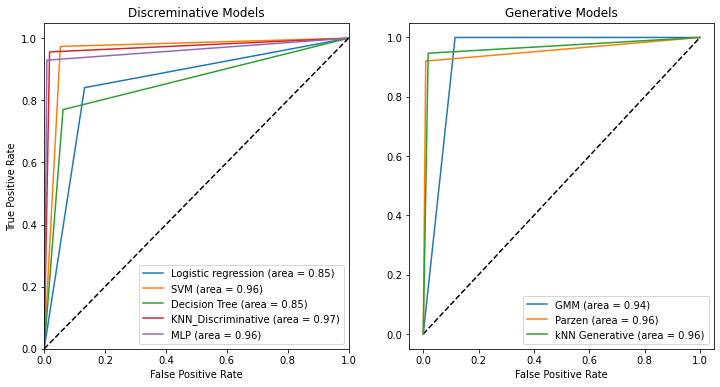

In [67]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(fpr_LR, tpr_LR, label='Logistic regression (area = %0.2f)' % LR_roc_auc)
plt.plot(fpr_SVM, tpr_SVM, label='SVM (area = %0.2f)' % SVM_roc_auc)
plt.plot(fpr_DT, tpr_DT, label='Decision Tree (area = %0.2f)' % DT_roc_auc)
plt.plot(fpr_knn_dis, tpr_knn_dis, label='KNN_Discriminative (area = %0.2f)' % knn_dis_roc_auc)
plt.plot(fpr_MLP, tpr_MLP, label='MLP (area = %0.2f)' % MLP_roc_auc)
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Discreminative Models')
plt.legend(loc="lower right")
plt.subplot(1,2,2)
plt.plot([0, 1], [0, 1],'k--')
plt.xlabel('False Positive Rate')
plt.title('Generative Models')
plt.plot(fpr_GMM, tpr_GMM, label='GMM (area = %0.2f)' % GMM_roc_auc )
plt.plot(fpr_Parzen, tpr_Parzen, label='Parzen (area = %0.2f)' % Parzen_roc_auc)
plt.plot(fpr_knn_gen, tpr_knn_gen, label='kNN Generative (area = %0.2f)' % knn_gen_roc_auc)
plt.legend(loc="lower right")


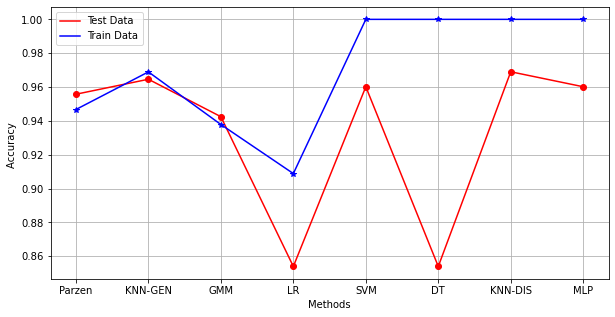

In [71]:
plt.figure(figsize=(10,5))
Methods = ['Parzen','KNN-GEN','GMM','LR','SVM','DT','KNN-DIS','MLP']
plt.plot(Methods, score_test,'r')
plt.plot(Methods, score_train,'b')
plt.plot(Methods, score_test,'ro')
plt.plot(Methods, score_train,'b*')
plt.legend(['Test Data','Train Data'])
plt.grid()
plt.xlabel('Methods')
plt.ylabel('Accuracy ');

# END